In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython import display
from matplotlib import style
os.chdir('drive/ml_directory/trading/')
pd.options.display.float_format = "{:.2f}".format
style.use('ggplot')

In [0]:
with open('auth.txt') as api:
    key = api.read()

In [0]:
def data_loader(symbols):
    timestamp = pd.date_range('12/1/2017', '5/30/2018')
    dataframe = pd.DataFrame(index=timestamp)
    for sym in symbols:
        link = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+sym+"&apikey="+str(key)+"&datatype=csv"
        df_tmp = pd.read_csv(link,
                         index_col='timestamp',
                         parse_dates=True,
                         usecols=['timestamp', 'adjusted_close'],
                         na_values=['nan'])
        df_tmp = df_tmp.rename(columns = {'adjusted_close': sym})
        dataframe = dataframe.join(df_tmp).dropna()
    return dataframe

symbols = ['IBM', 'GOOG', 'MSFT', 'TSLA', 'GLD', 'SPY', 'XOM']

In [6]:
my_df = data_loader(symbols=symbols)
display.display(my_df.tail(10))
print()
print('Global Mean: ')
print(my_df.mean(),'\n')
print('Gloabl Median: ')
print(my_df.median(),'\n')
print('Global Standard Deviation')
print(my_df.std(),'\n')

,IBM,GOOG,MSFT,TSLA,GLD,SPY,XOM
2018-04-19,147.70,1087.70,96.11,300.08,127.60,268.89,79.42
2018-04-20,144.90,1072.96,95.00,290.24,126.63,266.61,79.00
2018-04-23,145.86,1067.45,95.35,283.37,125.62,266.57,79.57
2018-04-24,145.56,1019.98,93.12,283.46,126.23,262.98,78.35
2018-04-25,145.94,1021.18,92.31,280.69,125.41,263.63,79.50
2018-04-26,146.72,1040.04,94.26,285.48,124.97,266.31,80.86
2018-04-27,146.48,1030.05,95.82,294.07,125.50,266.56,77.79
2018-04-30,144.96,1017.33,93.52,293.90,124.59,264.51,77.75
2018-05-01,145.00,1037.31,95.00,299.92,123.71,264.98,76.95
2018-05-02,142.45,1024.38,93.51,301.15,123.65,263.20,76.80



Global Mean: 
IBM     155.05
GOOG   1079.95
MSFT     90.71
TSLA    320.40
GLD     125.21
SPY     269.26
XOM      79.52
dtype: float64 

Gloabl Median: 
IBM     154.62
GOOG   1072.52
MSFT     91.48
TSLA    326.12
GLD     125.71
SPY     267.85
XOM      78.09
dtype: float64 

Global Standard Deviation
IBM     5.47
GOOG   48.61
MSFT    3.64
TSLA   23.65
GLD     2.57
SPY     6.41
XOM     4.67
dtype: float64 



### Rolling Mean of GOOG

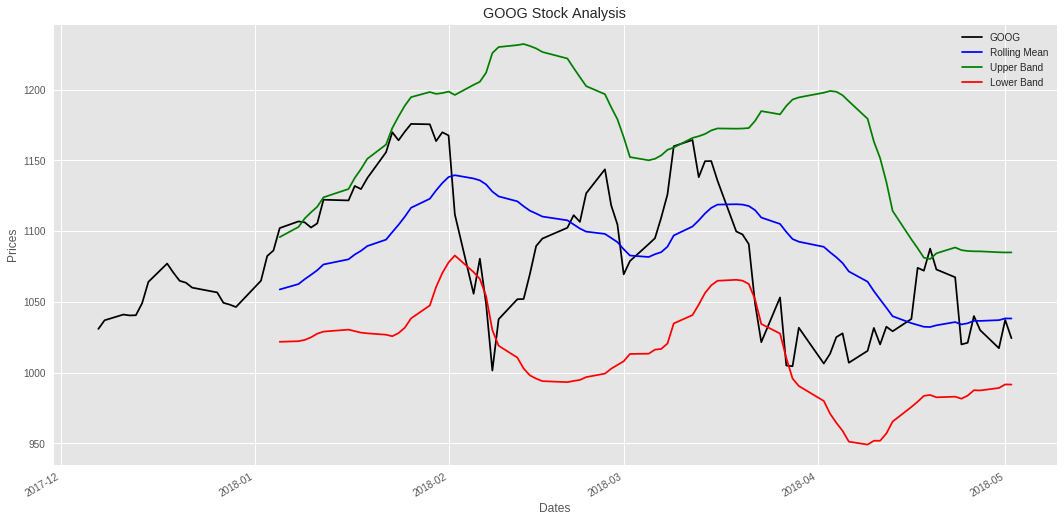

In [11]:
def plotting_roll(sym, win):
    print()
    sym = sym.upper()
  
    df = data_loader(symbols)
  
    plt.figure(figsize=(18, 9))
  
    ax = df[sym].plot(title=sym+' Stock Analysis',
                      label=sym,
                      color='k')

    rm = df[sym].rolling(window=win).mean()
    rm.plot(label='Rolling Mean',
            ax=ax,
            color='b')
  
    rstd = df[sym].rolling(window=win).std()
    up_band = rm + 2*rstd
    lw_band = rm - 2*rstd
    up_band.plot(label='Upper Band',
                 ax=ax,
                 color='g')
    lw_band.plot(label='Lower Band',
                 ax=ax,
                 color='r')
  
    ax.set_xlabel('Dates')
    ax.set_ylabel('Prices')
    ax.legend()
    plt.show()

plotting_roll('goog', 20)

In [8]:
my_dff = my_df.head(10)
display.display(my_dff)
my_dff = (my_dff/my_dff.shift(1)) - 1 
my_dff.iloc[0, :] = 0
display.display(my_dff)

,IBM,GOOG,MSFT,TSLA,GLD,SPY,XOM
2017-12-07,152.02,1030.93,82.11,311.24,118.49,261.69,81.72
2017-12-08,153.25,1037.05,83.77,315.13,118.48,263.12,81.83
2017-12-11,153.85,1041.10,84.84,328.91,118.01,263.91,82.19
2017-12-12,155.16,1040.48,85.19,341.03,118.15,264.38,81.93
2017-12-13,152.36,1040.61,84.96,339.03,119.17,264.35,82.28
2017-12-14,152.45,1049.15,84.30,337.89,118.93,263.27,82.07
2017-12-15,150.97,1064.19,86.45,343.45,119.18,265.45,82.19
2017-12-18,151.79,1077.14,85.98,338.87,119.73,267.13,82.11
2017-12-19,151.69,1070.68,85.43,331.10,119.82,266.11,81.61
2017-12-20,151.41,1064.95,85.13,328.98,120.14,265.97,82.04


,IBM,GOOG,MSFT,TSLA,GLD,SPY,XOM
2017-12-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-12-08,0.01,0.01,0.02,0.01,-0.00,0.01,0.00
2017-12-11,0.00,0.00,0.01,0.04,-0.00,0.00,0.00
2017-12-12,0.01,-0.00,0.00,0.04,0.00,0.00,-0.00
2017-12-13,-0.02,0.00,-0.00,-0.01,0.01,-0.00,0.00
2017-12-14,0.00,0.01,-0.01,-0.00,-0.00,-0.00,-0.00
2017-12-15,-0.01,0.01,0.03,0.02,0.00,0.01,0.00
2017-12-18,0.01,0.01,-0.01,-0.01,0.00,0.01,-0.00
2017-12-19,-0.00,-0.01,-0.01,-0.02,0.00,-0.00,-0.01
2017-12-20,-0.00,-0.01,-0.00,-0.01,0.00,-0.00,0.01


### Daily Returns

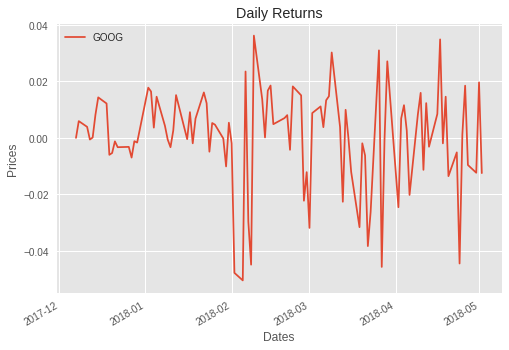

In [12]:
def daily_return_plotter(df):
  df = (df / df.shift(1)) - 1
  df.iloc[0, :] = 0
  # plt.figure(figsize=(20, 10))
  ax = df.plot(label=symbols)
  ax.set_title('Daily Returns')
  ax.set_xlabel('Dates')
  ax.set_ylabel('Prices')
  plt.show()

sym = ['GOOG']
daily_return_plotter(data_loader(symbols=sym))

### Cumulative Returns

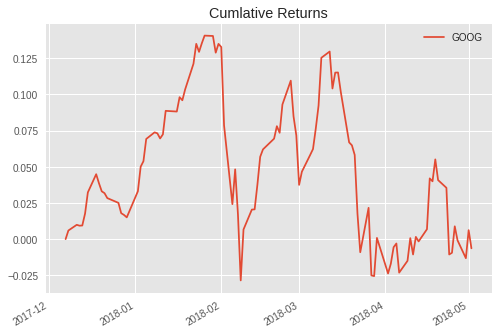

In [15]:
def cumulative_return_plotter(df):
  df = (df / df.iloc[0, :]) - 1
  df.plot(title='Cumlative Returns')
  plt.show()

sym = ['GOOG']
cumulative_return_plotter(data_loader(symbols=sym))

### Histograms and Scatterplot

In [16]:
df_29 = data_loader(symbols=symbols)
display.display(df_29.tail(10))

,IBM,GOOG,MSFT,TSLA,GLD,SPY,XOM
2018-04-19,147.70,1087.70,96.11,300.08,127.60,268.89,79.42
2018-04-20,144.90,1072.96,95.00,290.24,126.63,266.61,79.00
2018-04-23,145.86,1067.45,95.35,283.37,125.62,266.57,79.57
2018-04-24,145.56,1019.98,93.12,283.46,126.23,262.98,78.35
2018-04-25,145.94,1021.18,92.31,280.69,125.41,263.63,79.50
2018-04-26,146.72,1040.04,94.26,285.48,124.97,266.31,80.86
2018-04-27,146.48,1030.05,95.82,294.07,125.50,266.56,77.79
2018-04-30,144.96,1017.33,93.52,293.90,124.59,264.51,77.75
2018-05-01,145.00,1037.31,95.00,299.92,123.71,264.98,76.95
2018-05-02,142.45,1024.38,93.51,301.15,123.65,263.20,76.80


In [17]:
df_29 = (df_29 / df_29.shift(1)) - 1
df_29.iloc[0, :] = 0
display.display(df_29.head(10)) # Normalized for Daily Returns

,IBM,GOOG,MSFT,TSLA,GLD,SPY,XOM
2017-12-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-12-08,0.01,0.01,0.02,0.01,-0.00,0.01,0.00
2017-12-11,0.00,0.00,0.01,0.04,-0.00,0.00,0.00
2017-12-12,0.01,-0.00,0.00,0.04,0.00,0.00,-0.00
2017-12-13,-0.02,0.00,-0.00,-0.01,0.01,-0.00,0.00
2017-12-14,0.00,0.01,-0.01,-0.00,-0.00,-0.00,-0.00
2017-12-15,-0.01,0.01,0.03,0.02,0.00,0.01,0.00
2017-12-18,0.01,0.01,-0.01,-0.01,0.00,0.01,-0.00
2017-12-19,-0.00,-0.01,-0.01,-0.02,0.00,-0.00,-0.01
2017-12-20,-0.00,-0.01,-0.00,-0.01,0.00,-0.00,0.01


Mean: 0.00011858636310055348
Std: 0.011066600491385192
Kurtosis: 2.5800140736647514



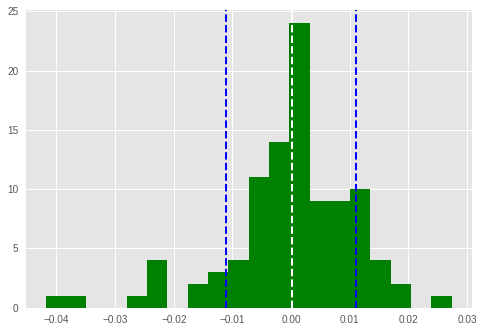

In [18]:
# Histogram with mean and standard_deviation
mean_spy = df_29['SPY'].mean()
print('Mean: {}'.format(mean_spy))
std_spy = df_29['SPY'].std()
print('Std: {}'.format(std_spy))
kurt_spy = df_29['SPY'].kurtosis()
print('Kurtosis: {}\n'.format(kurt_spy))

df_29['SPY'].hist(bins=20, color='g')
plt.axvline(mean_spy, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std_spy, color='b', linestyle='dashed', linewidth=2)
plt.axvline(-std_spy, color='b', linestyle='dashed', linewidth=2)
plt.show()

In [19]:
display.display(df_29.head(10))

,IBM,GOOG,MSFT,TSLA,GLD,SPY,XOM
2017-12-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-12-08,0.01,0.01,0.02,0.01,-0.00,0.01,0.00
2017-12-11,0.00,0.00,0.01,0.04,-0.00,0.00,0.00
2017-12-12,0.01,-0.00,0.00,0.04,0.00,0.00,-0.00
2017-12-13,-0.02,0.00,-0.00,-0.01,0.01,-0.00,0.00
2017-12-14,0.00,0.01,-0.01,-0.00,-0.00,-0.00,-0.00
2017-12-15,-0.01,0.01,0.03,0.02,0.00,0.01,0.00
2017-12-18,0.01,0.01,-0.01,-0.01,0.00,0.01,-0.00
2017-12-19,-0.00,-0.01,-0.01,-0.02,0.00,-0.00,-0.01
2017-12-20,-0.00,-0.01,-0.00,-0.01,0.00,-0.00,0.01


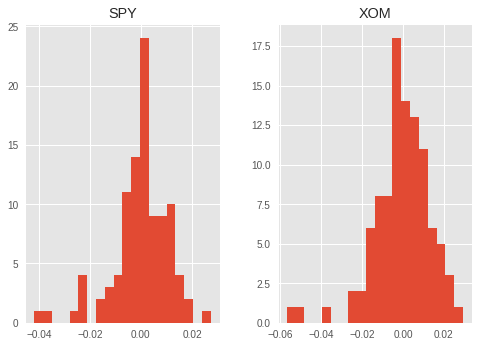

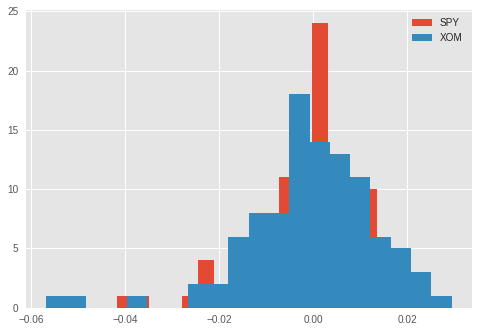

In [20]:
# Multiple Histograms
df_29[['SPY', 'XOM']].hist(bins=20)
plt.show()
print()
df_29['SPY'].hist(bins=20, label='SPY')
df_29['XOM'].hist(bins=20, label='XOM')
plt.legend()
plt.show()

In [21]:
# Scatterplot between SPY and XOM
display.display(df_29.head(10))

,IBM,GOOG,MSFT,TSLA,GLD,SPY,XOM
2017-12-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-12-08,0.01,0.01,0.02,0.01,-0.00,0.01,0.00
2017-12-11,0.00,0.00,0.01,0.04,-0.00,0.00,0.00
2017-12-12,0.01,-0.00,0.00,0.04,0.00,0.00,-0.00
2017-12-13,-0.02,0.00,-0.00,-0.01,0.01,-0.00,0.00
2017-12-14,0.00,0.01,-0.01,-0.00,-0.00,-0.00,-0.00
2017-12-15,-0.01,0.01,0.03,0.02,0.00,0.01,0.00
2017-12-18,0.01,0.01,-0.01,-0.01,0.00,0.01,-0.00
2017-12-19,-0.00,-0.01,-0.01,-0.02,0.00,-0.00,-0.01
2017-12-20,-0.00,-0.01,-0.00,-0.01,0.00,-0.00,0.01


Slope (on SPY & XOM): 0.8348567763122544
Intercept (on SPY & XOM): -0.0006219893993275708
Correlation (on SPY & XOM)
     SPY  XOM
SPY 1.00 0.66
XOM 0.66 1.00



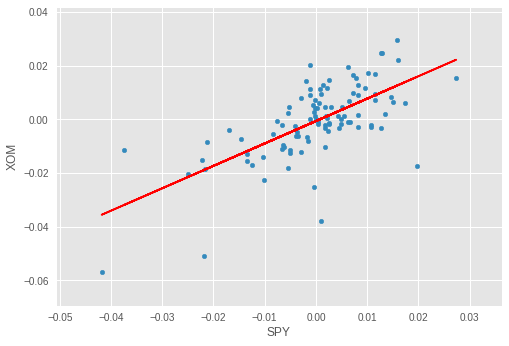


Slope (on GOOG & MSFT): 0.8584498830224673
Intercept (on GOOG & MSFT): 0.0013839524399924224
Correlation (on GOOG & MSFT)
      GOOG  MSFT
GOOG  1.00  0.84
MSFT  0.84  1.00



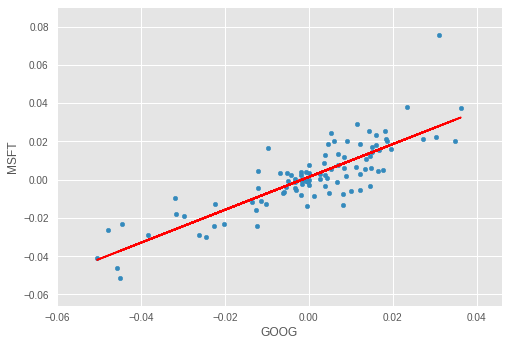

In [22]:
df_29.plot(kind='scatter', x='SPY', y='XOM')
beta_xom, alpha_xom = np.polyfit(df_29['SPY'], df_29['XOM'], 1)
print('Slope (on SPY & XOM): {}'.format(beta_xom))
print('Intercept (on SPY & XOM): {}'.format(alpha_xom))
corr_spy_xom = df_29[['SPY', 'XOM']].corr(method='pearson')
print('Correlation (on SPY & XOM)')
print('{}\n'.format(corr_spy_xom))
plt.plot(df_29['SPY'], ((beta_xom*df_29['SPY']) + alpha_xom), color='r')
plt.show()
print()
df_29.plot(kind='scatter', x='GOOG', y='MSFT')
beta_msft, alpha_msft = np.polyfit(df_29['GOOG'], df_29['MSFT'], 1)
print('Slope (on GOOG & MSFT): {}'.format(beta_msft))
print('Intercept (on GOOG & MSFT): {}'.format(alpha_msft))
corr_goog_msft = df_29[['GOOG', 'MSFT']].corr(method='pearson')
print('Correlation (on GOOG & MSFT)')
print('{}\n'.format(corr_goog_msft))
plt.plot(df_29['GOOG'], ((beta_msft*df_29['GOOG']) + alpha_msft), color='r')
plt.show()

Overall Correlation
       IBM  GOOG  MSFT  TSLA   GLD  SPY  XOM
IBM   1.00  0.60  0.62  0.26 -0.02 0.67 0.39
GOOG  0.60  1.00  0.84  0.42  0.03 0.87 0.57
MSFT  0.62  0.84  1.00  0.48 -0.00 0.89 0.48
TSLA  0.26  0.42  0.48  1.00  0.07 0.51 0.37
GLD  -0.02  0.03 -0.00  0.07  1.00 0.05 0.19
SPY   0.67  0.87  0.89  0.51  0.05 1.00 0.66
XOM   0.39  0.57  0.48  0.37  0.19 0.66 1.00



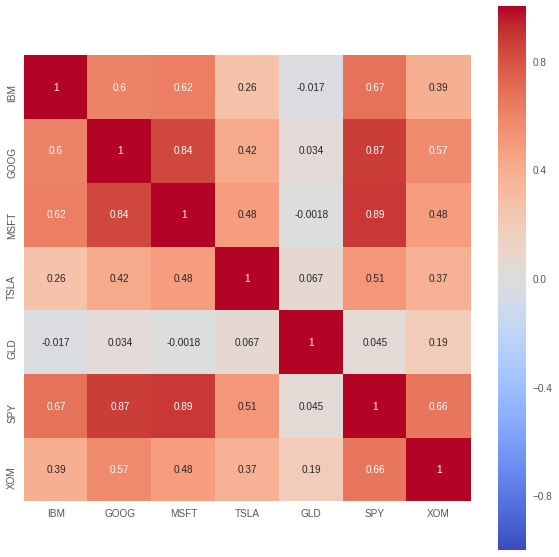

In [23]:
over_all_corr = df_29.corr(method='pearson')
print('Overall Correlation')
print('{}\n'.format(over_all_corr))

plt.figure(figsize=(10, 10))
sns.heatmap(over_all_corr,
            cbar=True,
            square=True,
            annot=True,
            annot_kws={'size': 10},
            xticklabels=symbols,
            yticklabels=symbols,
            cmap='coolwarm')
plt.show()

In [24]:
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2010, 2, 9)
end = datetime(2018, 4, 24)

f = web.DataReader('GOOG', 'morningstar', start, end)
f.tail()

Close    High     Low    Open   Volume
Symbol Date                                               
GOOG   2018-04-18 1072.08 1077.43 1066.22 1077.43  1344138
       2018-04-19 1087.70 1094.16 1068.18 1069.40  1747671
       2018-04-20 1072.96 1092.35 1069.57 1082.00  1889686
       2018-04-23 1067.45 1082.72 1060.70 1077.86  2341258
       2018-04-24 1019.98 1057.00 1010.59 1052.00  4760260

In [27]:
import pandas_datareader.data as web

symbol = 'IBM'  # or 'AAPL.US'

df = web.DataReader(symbol, 'quandl', '2014-01-01', '2018-04-30')
display.display(df.head())
len(df)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,153.95,154.87,151.16,151.91,3810994.00,0.00,1.00,153.95,154.87,151.16,151.91,3810994.00
2018-03-26,151.21,153.66,150.28,153.37,4038586.00,0.00,1.00,151.21,153.66,150.28,153.37,4038586.00
2018-03-23,152.25,152.58,148.54,148.89,4389015.00,0.00,1.00,152.25,152.58,148.54,148.89,4389015.00
2018-03-22,155.00,155.25,152.00,152.09,4617371.00,0.00,1.00,155.00,155.25,152.00,152.09,4617371.00
2018-03-21,156.57,158.20,155.92,156.69,3240695.00,0.00,1.00,156.57,158.20,155.92,156.69,3240695.00


1065